# Multivariable Linear Regression Using Formulation

In [1]:
import numpy as np

In [2]:
# define the data
X = np.array([[1, 1, 2, 3], [1, 2, 3, 5], [1, 4, 3, -1], [1, 8, 6, 4]])
y = np.array([4, 8, 5, 10]).reshape(-1, 1)

In [3]:
w = np.linalg.inv(X.T@X)@X.T @ y

In [4]:
print('w1~n is', w[1:].flatten())
print('w0 is', w[0])

w1~n is [-9.75 19.25 -2.75]
w0 is [-16.5]


# Multivariable Linear Regression Using Scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# define the data
X = np.array([[1, 2, 3], [2, 3, 5], [4, 3, -1], [8, 6, 4]])
y = np.array([4, 8, 5, 10])

In [7]:
reg = LinearRegression().fit(X, y)

print('w1 is', reg.coef_)
print('w0 is', reg.intercept_)

w1 is [-9.75 19.25 -2.75]
w0 is -16.49999999999995


# Polynomial Regression Using Scikit-learn

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# load the data
FD_data = pd.read_csv('FD_data.csv')
# show the data
FD_data.head()

# k and q are in the shape: [n_samples, n_features]
k = FD_data['k'].to_numpy().reshape(-1, 1)
q = FD_data['q'].to_numpy().reshape(-1, 1)


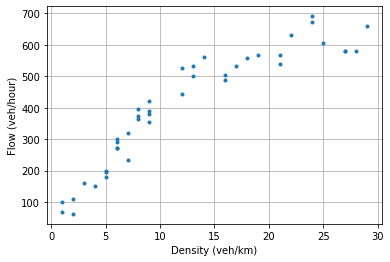

In [10]:
plt.plot(k, q, '.')
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')
plt.grid()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(k)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# we do this because polynomial regression is linear
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, q)
# predicted from fitted model
y_predicted = poly_reg_model.predict(poly_features)
FD_data['Fitted'] = y_predicted

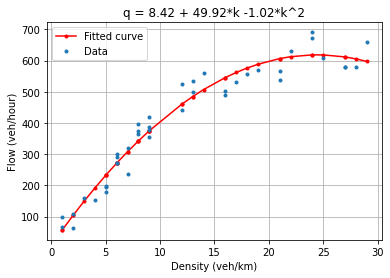

In [15]:
FD_data = FD_data.sort_values(by='k')
## plot the predicted data
plt.plot(FD_data['k'], FD_data['Fitted'], 'r.-', label='Fitted curve')
plt.plot(FD_data['k'], FD_data['q'], '.', label='Data')
plt.legend(loc=0)
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')
plt.title('q = %.2f + %.2f*k %.2f*k^2'%(
    poly_reg_model.intercept_[0], poly_reg_model.coef_[0, 0], poly_reg_model.coef_[0, 1]
))
plt.grid()

# Ridge regression

In [16]:
from sklearn import linear_model
from sklearn.preprocessing import minmax_scale

In [17]:
# take the first 48 stations becasue the 
# last 2 stations were not yet opened
# by the time this data was collected
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, 1:]
data_BART_sld.head()

,TotPop,AutoOwn0,TotEmp,Tot Rd Dens
0,11084,1664,33120,42.232657
1,142973,20505,103479,32.296762
2,36177,4704,47570,31.822631
3,104191,8018,39663,32.894203
4,70630,1142,13924,20.531431


In [18]:
# Embarcadero is the 18th station in the list
OD_BART = np.load('3d_daily.npy').sum(axis=2)[17, :48]

In [19]:
print('Shape of data_BART_sld', data_BART_sld.shape)
print('Shape of OD_BART', OD_BART.shape)

Shape of data_BART_sld (48, 4)
Shape of OD_BART (48,)


In [20]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, y)
    
    return reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]

In [21]:
intercept_set = []
coef1_set = []
coef2_set = []
coef3_set = []
coef4_set = []

alpha_set = np.arange(0, 1.05, 0.05)
for alpha in alpha_set:
    intercept, coef1, coef2, coef3, coef4 = get_w(alpha)
    intercept_set.append(intercept)
    coef1_set.append(coef1)
    coef2_set.append(coef2)
    coef3_set.append(coef3)
    coef4_set.append(coef4)
    

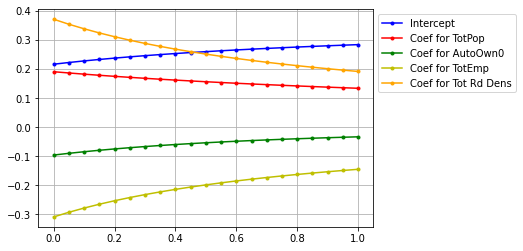

In [22]:
plt.plot(alpha_set, intercept_set, 'b.-', label='Intercept')
plt.plot(alpha_set, coef1_set, 'r.-', label='Coef for TotPop')
plt.plot(alpha_set, coef2_set, 'g.-', label='Coef for AutoOwn0')
plt.plot(alpha_set, coef3_set, 'y.-', label='Coef for TotEmp')
plt.plot(alpha_set, coef4_set, '.-', color='orange', label='Coef for Tot Rd Dens')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

# LASSO regression

In [23]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    reg = linear_model.Lasso(alpha=alpha)
    reg.fit(X, y)
    
    return reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]

In [24]:
intercept_set = []
coef1_set = []
coef2_set = []
coef3_set = []
coef4_set = []

alpha_set = np.arange(0, 0.05, 0.001)
for alpha in alpha_set:
    intercept, coef1, coef2, coef3, coef4 = get_w(alpha)
    intercept_set.append(intercept)
    coef1_set.append(coef1)
    coef2_set.append(coef2)
    coef3_set.append(coef3)
    coef4_set.append(coef4)
    

/var/folders/6v/_k68w5jd2fjdr7stnfl1_q_c0000gn/T/ipykernel_58575/1736399961.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0554018784683326, tolerance: 0.0002442949254712368
  model = cd_fast.enet_coordinate_descent(


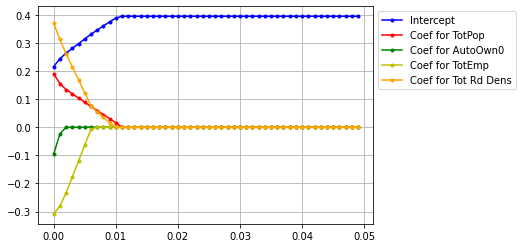

In [25]:
plt.plot(alpha_set, intercept_set, 'b.-', label='Intercept')
plt.plot(alpha_set, coef1_set, 'r.-', label='Coef for TotPop')
plt.plot(alpha_set, coef2_set, 'g.-', label='Coef for AutoOwn0')
plt.plot(alpha_set, coef3_set, 'y.-', label='Coef for TotEmp')
plt.plot(alpha_set, coef4_set, '.-', color='orange', label='Coef for Tot Rd Dens')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))